<a href="https://colab.research.google.com/github/redrum88/100-Days-of-Code-Python-Bootcamp/blob/main/day_100_Determinants_of_Earnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [5]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [14]:
print(f"df_data shape: {df_data.shape}")
print(f"Rows: {df_data.shape[0]}")
print(f"Column: {df_data.shape[1]}")
print(f"Column names: {df_data.columns}")
df_data.isna().sum()
print(f"Check duplicates: {df_data.duplicated().sum()}")


df_data shape: (2000, 96)
Rows: 2000
Column: 96
Column names: Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CA

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [15]:
duplicates = df_data[df_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
df_data = df_data.drop_duplicates()
print("df_data shape after removing duplicates:", df_data.shape)

# Fill numeric rows with the median
for label, content in df_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if data was missing or not
            df_data[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_data[label] = content.fillna(content.median())

# Check if there's any null numeric values
for label, content in df_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# Turn categorical variables into numers and fill missing
for label, content in df_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_data[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numers and add +1
        df_data[label] = pd.Categorical(content).codes+1
        

Number of duplicate rows: 513
df_data shape after removing duplicates: (1487, 96)


## Descriptive Statistics

In [16]:
numeric_cols = ['EARNINGS', 'AGE', 'AGEMBTH', 'HHINC97']
desc_stats = df_data[numeric_cols].describe()
educba_mode = df_data['EDUCBA'].mode()
print(desc_stats)
print("\nMode for EDUCBA:", educba_mode[0])

       EARNINGS      AGE  AGEMBTH    HHINC97
count  1,487.00 1,487.00 1,453.00   1,205.00
mean      18.81    28.93    26.32  58,310.67
std       12.00     1.38     5.08  43,868.05
min        2.00    27.00    12.00       0.00
25%       11.41    28.00    23.00  32,000.00
50%       15.75    29.00    26.00  50,500.00
75%       22.60    30.00    30.00  72,000.00
max      132.89    31.00    45.00 246,474.00

Mode for EDUCBA: 0


## Visualise the Features

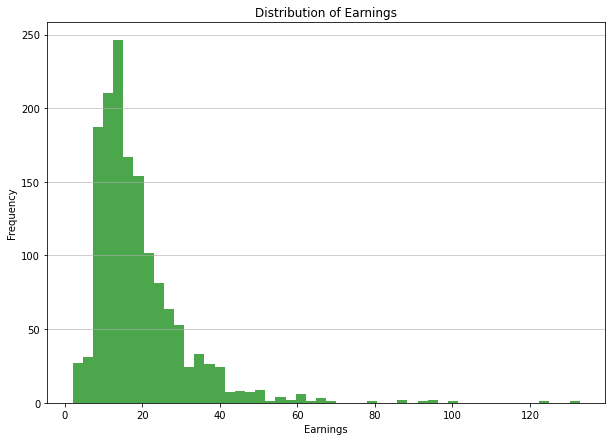

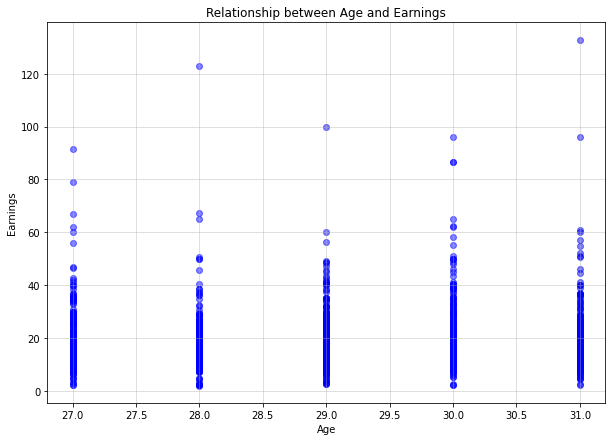

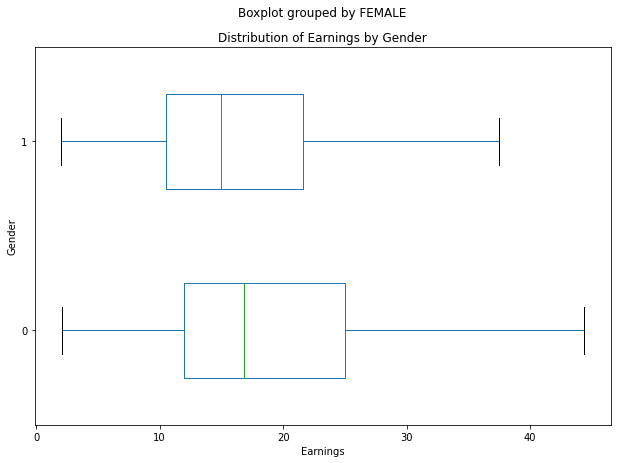

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,7)

# Visualize the distribution of earnings using a histogram
plt.hist(df_data['EARNINGS'], bins=50, color='green', alpha=0.7)
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.title('Distribution of Earnings')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Visualize the relationship between age and earnings using a scatterplot
plt.scatter(df_data['AGE'], df_data['EARNINGS'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Earnings')
plt.title('Relationship between Age and Earnings')
plt.grid(alpha=0.5)
plt.show()

# Visualize the distribution of earnings by gender using a boxplot
df_data.boxplot(column='EARNINGS', by='FEMALE', grid=False, showfliers=False, vert=False, widths=0.5)
plt.xlabel('Earnings')
plt.ylabel('Gender')
plt.title('Distribution of Earnings by Gender')
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [40]:
# Split in to X, y
X = df_data.drop("EARNINGS", axis=1)
y = df_data['EARNINGS'] # y

# Make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=10)
len(X_train), len(y_train), len(X_test), len(y_test)

(1189, 1189, 298, 298)

### Create evaluation function

In [49]:
# Create evaluation functions
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    # Calculates root mean squared log error between predictions and true labels.
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_test, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_test, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_test, val_preds)}
    return scores

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [50]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
show_scores(model)

{'Training MAE': 2.6025069806560133,
 'Valid MAE': 6.69680033557047,
 'Training RMSLE': 0.21311304451551755,
 'Valid RMSLE': 0.4569288707281177,
 'Training R^2': 0.8832305337758604,
 'Valid R^2': 0.19212418245111662}

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Step 1: Split into X and y
X = df_data.drop(['EARNINGS'], axis=1).values
y = df_data['EARNINGS'].values

# Step 2: Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mse,
              metrics=["mse", "mae"])

# Fit model
model.fit(X_train, y_train,
          epochs=15,
          steps_per_epoch=len(X_train),
          validation_data=(X_test, y_test),
          validation_steps=len(X_test))

Epoch 1/15
1189/1189 [==============================] - 4s 3ms/step - loss: 457.2079 - mse: 457.2079 - mae: 17.6370 - val_loss: 418.7800 - val_mse: 418.7800 - val_mae: 17.0232
Epoch 2/15
1189/1189 [==============================] - 3s 2ms/step - loss: 383.4499 - mse: 383.4499 - mae: 15.8263 - val_loss: 355.6872 - val_mse: 355.6872 - val_mae: 15.2614
Epoch 3/15
1189/1189 [==============================] - 2s 2ms/step - loss: 327.1055 - mse: 327.1055 - mae: 14.1884 - val_loss: 313.8979 - val_mse: 313.8979 - val_mae: 14.0334
Epoch 4/15
1189/1189 [==============================] - 2s 2ms/step - loss: 293.5938 - mse: 293.5938 - mae: 13.1785 - val_loss: 290.6997 - val_mse: 290.6997 - val_mae: 13.2951
Epoch 5/15
1189/1189 [==============================] - 2s 2ms/step - loss: 274.7530 - mse: 274.7530 - mae: 12.6550 - val_loss: 277.8879 - val_mse: 277.8879 - val_mae: 12.8875
Epoch 6/15
1189/1189 [==============================] - 3s 3ms/step - loss: 263.3368 - mse: 263.3368 - mae: 12.3624 - va

In [59]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 198.7957 - mse: 198.7957 - mae: 10.2728


[198.7957000732422, 198.7957000732422, 10.2728271484375]

In [61]:
X_test
#model.predict()

array([[ 0.30553541,  0.52202404, -1.4174284 , ..., -0.49221169,
        -0.19965004, -0.16194129],
       [-1.27323206, -0.56313404,  0.01745522, ..., -0.49221169,
        -0.19965004, -0.16194129],
       [ 0.83311848, -0.20141468, -0.38673728, ..., -0.49221169,
        -0.19965004, -0.16194129],
       ...,
       [-0.5709493 , -0.9248534 ,  1.44560117, ..., -0.49221169,
        -0.19965004, -0.16194129],
       [-0.54257927, -0.56313404,  1.0346731 , ...,  2.03164618,
        -0.19965004, -0.16194129],
       [ 0.27716537,  0.52202404, -1.33658997, ..., -0.49221169,
        -0.19965004, -0.16194129]])

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

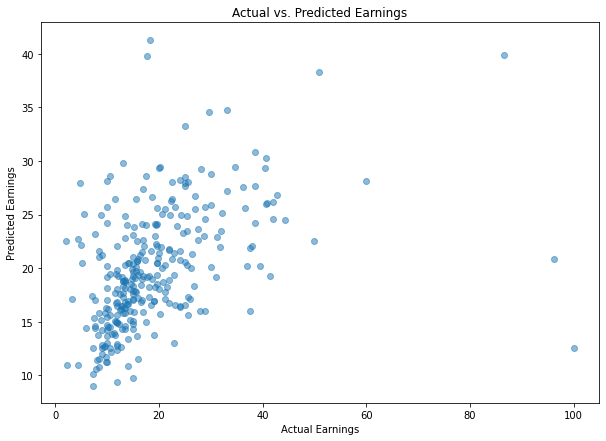

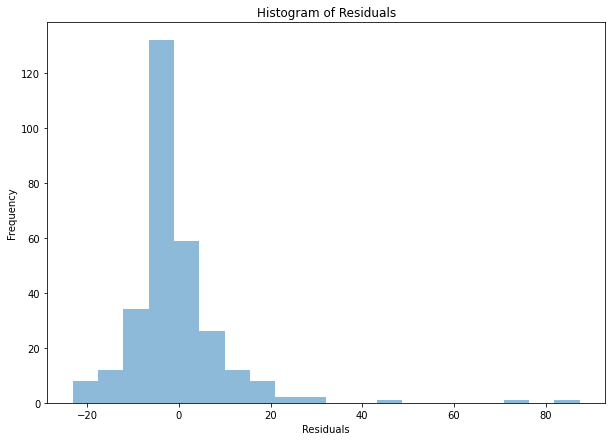

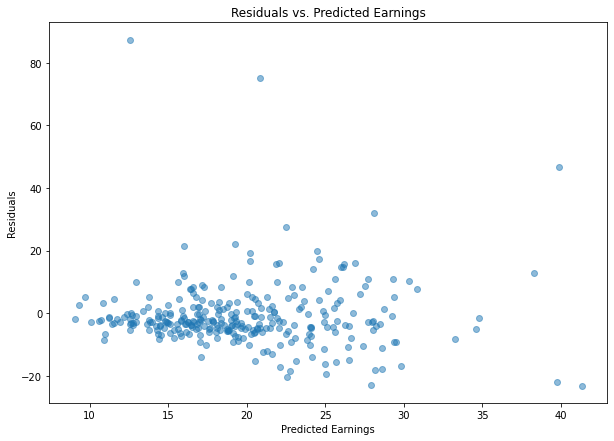

Mean Absolute Error: 6.7
Root Mean Squared Error: 10.78


In [53]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Earnings")
    plt.ylabel("Predicted Earnings")
    plt.title("Actual vs. Predicted Earnings")
    plt.show()
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 7))
    plt.hist(residuals, bins=20, alpha=0.5)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.show()
    plt.figure(figsize=(10, 7))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel("Predicted Earnings")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Earnings")
    plt.show()
    print("Mean Absolute Error:", round(np.mean(np.abs(residuals)), 2))
    print("Root Mean Squared Error:", round(np.sqrt(np.mean(residuals ** 2)), 2))

visualize_predictions(model, X_test, y_test)


In [54]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature rankings
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")

1. ASVABCS: 0.07814631831794909
2. ASVABMK: 0.06457381311805381
3. HOURS: 0.06206758565332441
4. TENURE: 0.055647623339394124
5. S: 0.04997727219109627
6. ASVABAR: 0.04723794874063895
7. HHINC97: 0.04662724388011531
8. EXP: 0.04390053559339775
9. ID: 0.04369166405727459
10. CATSE: 0.03906062249791287
11. EDUCPROF: 0.02353824125882327
12. ASVABWK: 0.023470092311442342
13. WEIGHT11: 0.02222926936366332
14. HEIGHT: 0.020908967157348073
15. ASVABNO: 0.020525618206228287
16. POVRAT97: 0.02016905362254553
17. JOBS: 0.019184715135336795
18. WEIGHT04: 0.017766069206290477
19. ASVABMV: 0.01626378966612586
20. AGEMBTH: 0.015544124298602776
21. ASVABPC: 0.01459482189273855
22. VERBAL: 0.014056357398420039
23. SFR: 0.013260368638517874
24. PRMONM: 0.013040215246669871
25. COLLBARG: 0.01229600574228278
26. ASVABC4: 0.011801652911177619
27. PRMONF: 0.01057847745911617
28. ASVABC: 0.010302490873360824
29. SF: 0.009656118307111154
30. SIBLINGS: 0.009217284487670863
31. BYEAR: 0.007947561768022306
32. 

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

### Evaluate the Coefficients of the Model

### Analyse the Estimated Values & Regression Residuals

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 